In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [58]:
# path = '../dataset/detailed_data.csv'
path = "/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv"
data = pd.read_csv(path)
print(data.head())

                                                text  generated
0  carfree cities become subject increasing inter...          1
1  car free cities carfree cities concept gaining...          1
2  sustainable urban future carfree cities emergi...          1
3  pioneering sustainable urban living era marked...          1
4  path sustainable urban living age rapid urbani...          1


In [59]:
data['text'].isna().sum()

1

In [60]:
data['text'] = data['text'].fillna('')

In [61]:
data['text'].isna().sum()

0

In [62]:
data['generated'].isna().sum()

0

In [63]:
X= data['text']
y= data['generated']

In [64]:
tfidfvectorizer = TfidfVectorizer(max_features=5000)

X_tfidf = tfidfvectorizer.fit_transform(X)

In [65]:
X_tfidf_dense = X_tfidf.toarray()

In [66]:
X_train, X_val, y_train, y_val= train_test_split(X_tfidf_dense, y, test_size= 0.2, random_state= 42)

In [67]:
model = Sequential()
model.add(Embedding(5000, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
729/729 [==============================] - 111s 150ms/step - loss: 0.6743 - accuracy: 0.5986 - val_loss: 0.6711 - val_accuracy: 0.6071
Epoch 2/10
729/729 [==============================] - 107s 147ms/step - loss: 0.6738 - accuracy: 0.5991 - val_loss: 0.6710 - val_accuracy: 0.6071
Epoch 3/10
729/729 [==============================] - 107s 147ms/step - loss: 0.6739 - accuracy: 0.5991 - val_loss: 0.6700 - val_accuracy: 0.6071
Epoch 4/10
729/729 [==============================] - 107s 147ms/step - loss: 0.6737 - accuracy: 0.5991 - val_loss: 0.6704 - val_accuracy: 0.6071
Epoch 5/10
729/729 [==============================] - 108s 148ms/step - loss: 0.6737 - accuracy: 0.5991 - val_loss: 0.6701 - val_accuracy: 0.6071
Epoch 6/10
729/729 [==============================] - 107s 147ms/step - loss: 0.6736 - accuracy: 0.5991 - val_loss: 0.6701 - val_accuracy: 0.6071
Epoch 7/10
729/729 [==============================] - 107s 147ms/step - loss: 0.6736 - accuracy: 0.5991 - val_loss: 0.6707 -

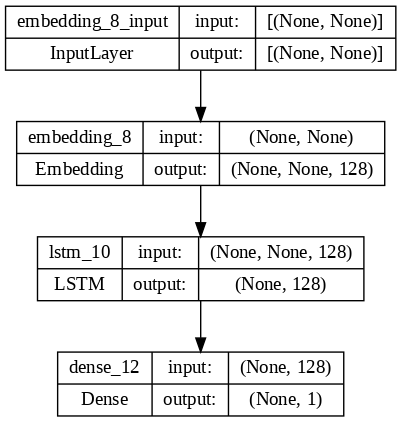

In [68]:
tf.keras.utils.plot_model(model=model,show_shapes=True, dpi=100)

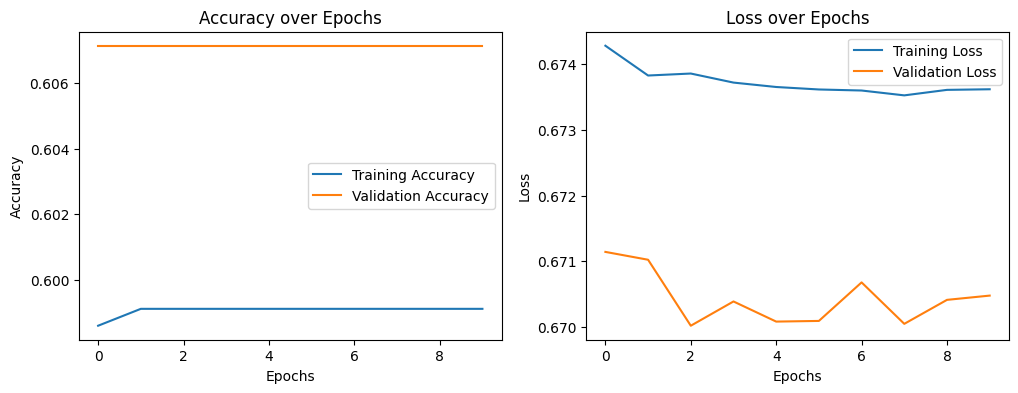

In [69]:
# Training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [70]:
from tensorflow.keras.layers import Dropout, Bidirectional, SpatialDropout1D

model_2 = Sequential()
model_2.add(Embedding(input_dim=5000, output_dim=128, input_length=X_train.shape[1]))
model_2.add(SpatialDropout1D(0.2))
model_2.add(Bidirectional(LSTM(128, return_sequences=True)))
model_2.add(Dropout(0.2))
model_2.add(Bidirectional(LSTM(64)))
model_2.add(Dropout(0.2))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
729/729 [==============================] - 432s 583ms/step - loss: 0.6752 - accuracy: 0.5988 - val_loss: 0.6711 - val_accuracy: 0.6071
Epoch 2/10
729/729 [==============================] - 423s 580ms/step - loss: 0.6741 - accuracy: 0.5991 - val_loss: 0.6705 - val_accuracy: 0.6071
Epoch 3/10
729/729 [==============================] - 423s 580ms/step - loss: 0.6737 - accuracy: 0.5991 - val_loss: 0.6704 - val_accuracy: 0.6071
Epoch 4/10
729/729 [==============================] - 423s 580ms/step - loss: 0.6736 - accuracy: 0.5991 - val_loss: 0.6702 - val_accuracy: 0.6071
Epoch 5/10
729/729 [==============================] - 423s 580ms/step - loss: 0.6736 - accuracy: 0.5991 - val_loss: 0.6703 - val_accuracy: 0.6071
Epoch 6/10
729/729 [==============================] - 423s 580ms/step - loss: 0.6738 - accuracy: 0.5991 - val_loss: 0.6713 - val_accuracy: 0.6071
Epoch 7/10
729/729 [==============================] - 423s 580ms/step - loss: 0.6736 - accuracy: 0.5991 - val_loss: 0.6700 -

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model_2.predict(X_val)
Y_pred = np.round(y_pred).flatten()
Y_test = np.array(y_val)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

183/183 [==============================] - 40s 216ms/step
MSE: 0.3928632698576085
RMSE: 0.6267880581644871
MAE: 0.3928632698576085
R²: -0.6470754450409719


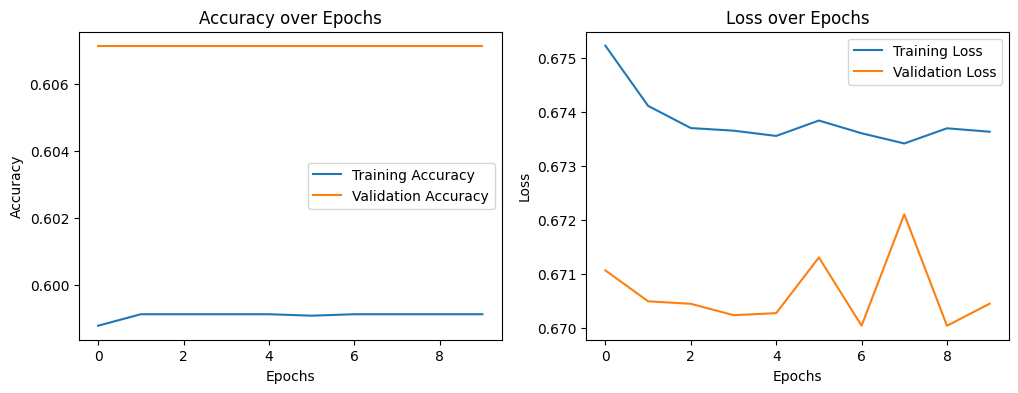

In [75]:
# Training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

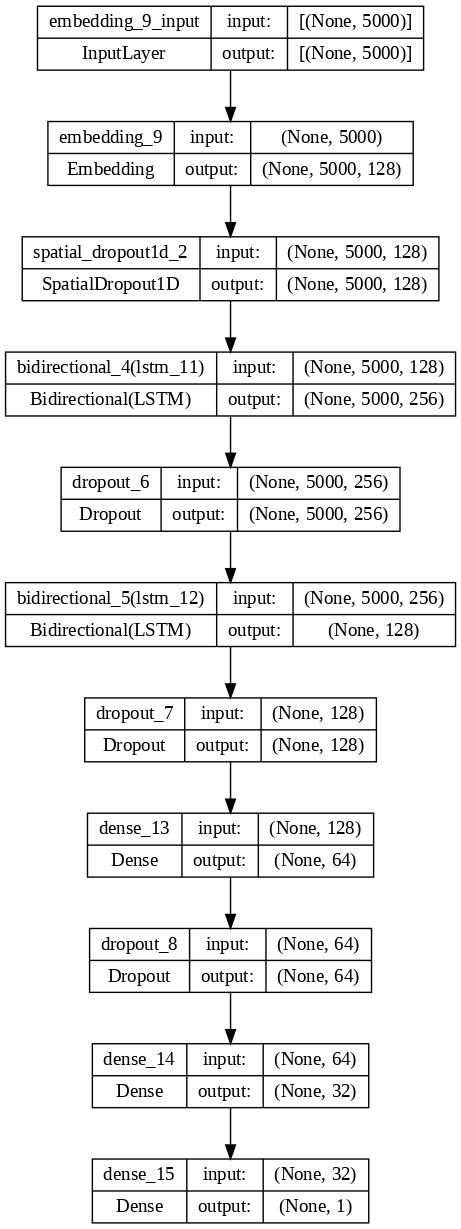

In [76]:
tf.keras.utils.plot_model(model=model_2,show_shapes=True, dpi=100)

In [77]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [83]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

maxlen = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen)

model_3 = Sequential()
model_3.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))
model_3.add(SpatialDropout1D(0.3))
model_3.add(Bidirectional(LSTM(128, return_sequences=True)))
model_3.add(Dropout(0.3))
model_3.add(Bidirectional(LSTM(64)))
model_3.add(Dropout(0.3))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_3 = model_3.fit(X_train_pad, y_train, epochs=10, batch_size=16, validation_data=(X_val_pad, y_val), callbacks=[early_stopping])

Epoch 1/10
1458/1458 [==============================] - 86s 54ms/step - loss: 0.1094 - accuracy: 0.9646 - val_loss: 0.0483 - val_accuracy: 0.9883
Epoch 2/10
1458/1458 [==============================] - 47s 32ms/step - loss: 0.0282 - accuracy: 0.9922 - val_loss: 0.0460 - val_accuracy: 0.9873
Epoch 3/10
1458/1458 [==============================] - 45s 31ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0319 - val_accuracy: 0.9923
Epoch 4/10
1458/1458 [==============================] - 44s 31ms/step - loss: 0.0122 - accuracy: 0.9968 - val_loss: 0.0288 - val_accuracy: 0.9909
Epoch 5/10
1458/1458 [==============================] - 44s 30ms/step - loss: 0.0297 - accuracy: 0.9925 - val_loss: 0.0213 - val_accuracy: 0.9945
Epoch 6/10
1458/1458 [==============================] - 44s 30ms/step - loss: 0.0133 - accuracy: 0.9964 - val_loss: 0.0247 - val_accuracy: 0.9931
Epoch 7/10
1458/1458 [==============================] - 44s 30ms/step - loss: 0.0080 - accuracy: 0.9979 - val_loss: 0.0322 -

In [85]:
y_pred = model_3.predict(X_val_pad)
Y_pred = np.round(y_pred).flatten()
Y_test = np.array(y_val)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

183/183 [==============================] - 3s 12ms/step
MSE: 0.005489792417224223
RMSE: 0.07409313340130935
MAE: 0.005489792417224223
R²: 0.9769840985845804


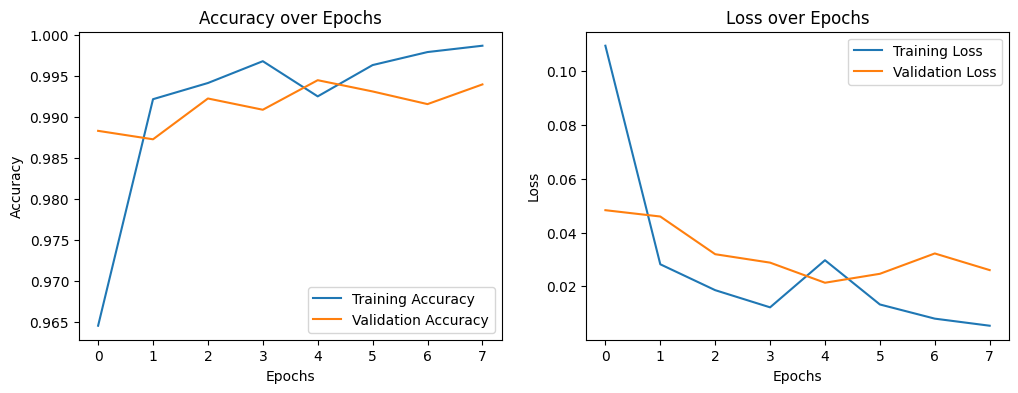

In [86]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

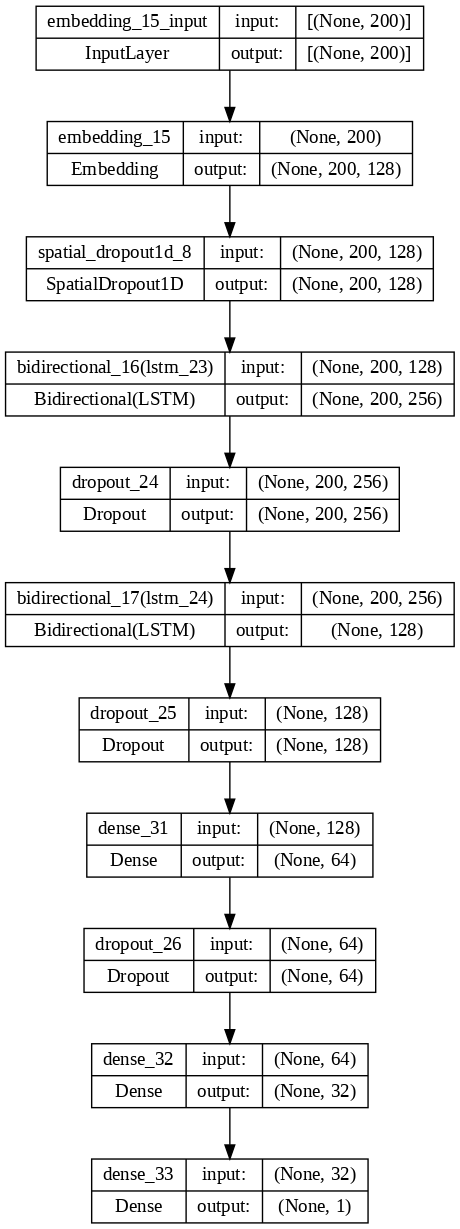

In [87]:
tf.keras.utils.plot_model(model=model_3,show_shapes=True, dpi=100)